#### Classifying Flowers into species

##### Table of Content
- **Data collection**
- **Data Cleaning**
- **Feature Engineering**
- **Machine Learning Model**

#### Data Collection

In [15]:
# Loading Necessary Libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import warnings
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Checking data types

df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
# Checking data statistics

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Checking the no of columns and rows 0- 150 rows and 5 columns

df.shape

(150, 5)

In [7]:
# Checking for missing values - No missing values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Data analysis and visualization - The process of understanding and visualizing the data

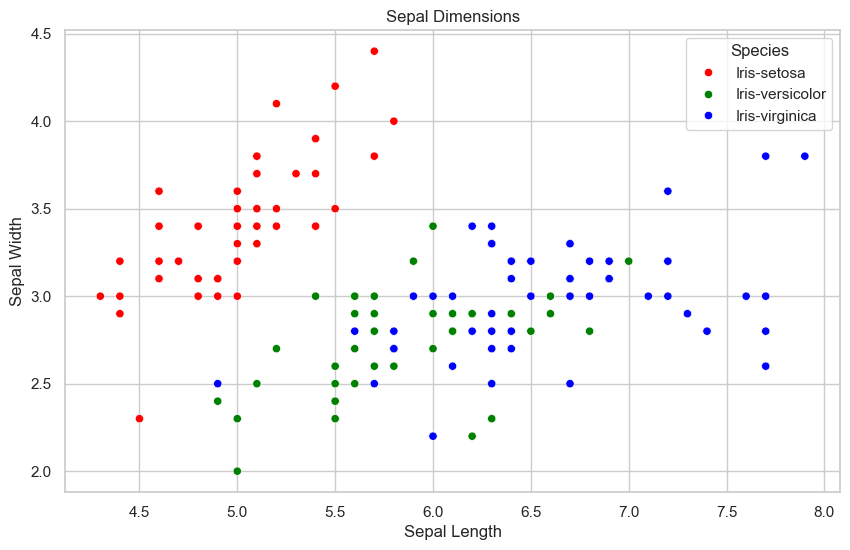

In [8]:
# Scatter plot to check sepal dimensions - Iris-virginica have longer dimensions and Iris-setosa have shorter dimensions

# Define a colormap for species
color_map = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

# Map species names to colors
colors = df['species'].map(color_map)

# Set the style
sns.set(style="whitegrid")

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', palette=color_map)
plt.title('Sepal Dimensions')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Species')
plt.show()

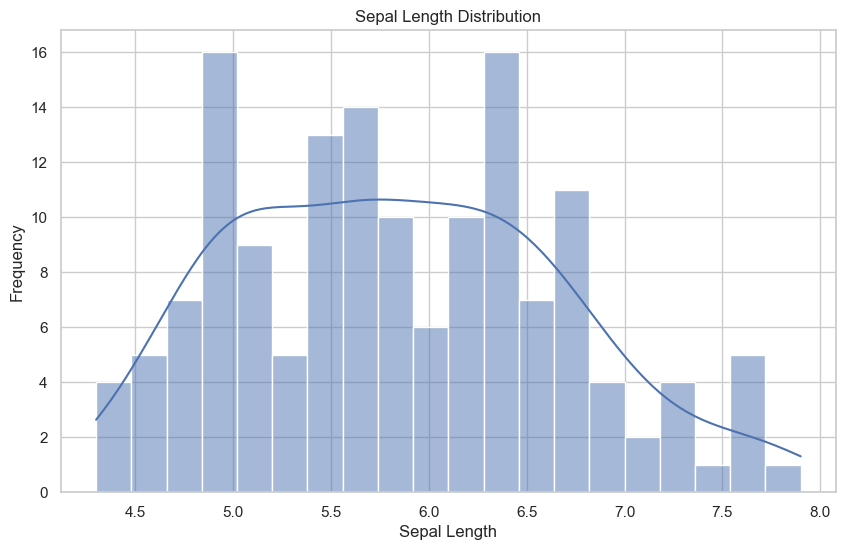

In [9]:
# An histogram showing sepal length distribution more lengths are between 5.0 -  7.0

# Set the style
sns.set(style="whitegrid")

# Create the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['sepal_length'], bins=20, kde=True)
plt.title('Sepal Length Distribution')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

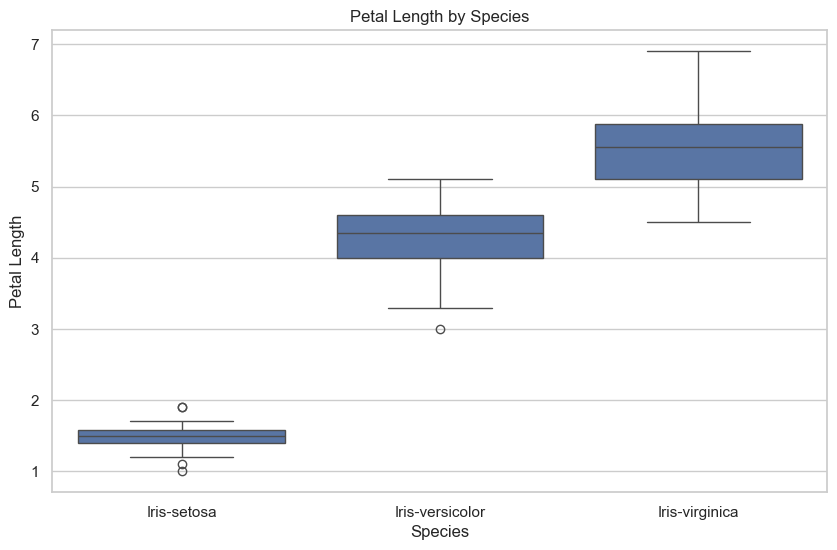

In [10]:
#Box plot showing Petal Length by Species

# Set the style
sns.set(style="whitegrid")

# Create the box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.show()

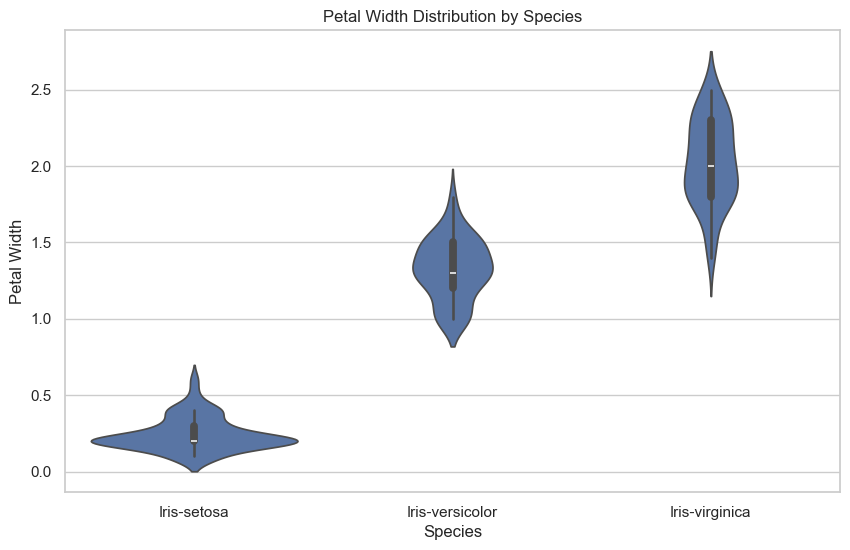

In [11]:
# Violin plot showing petal width distribution by species

# Set the style
sns.set(style="whitegrid")

# Create the violin plot using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='petal_width', data=df)
plt.title('Petal Width Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.show()

<Figure size 1000x600 with 0 Axes>

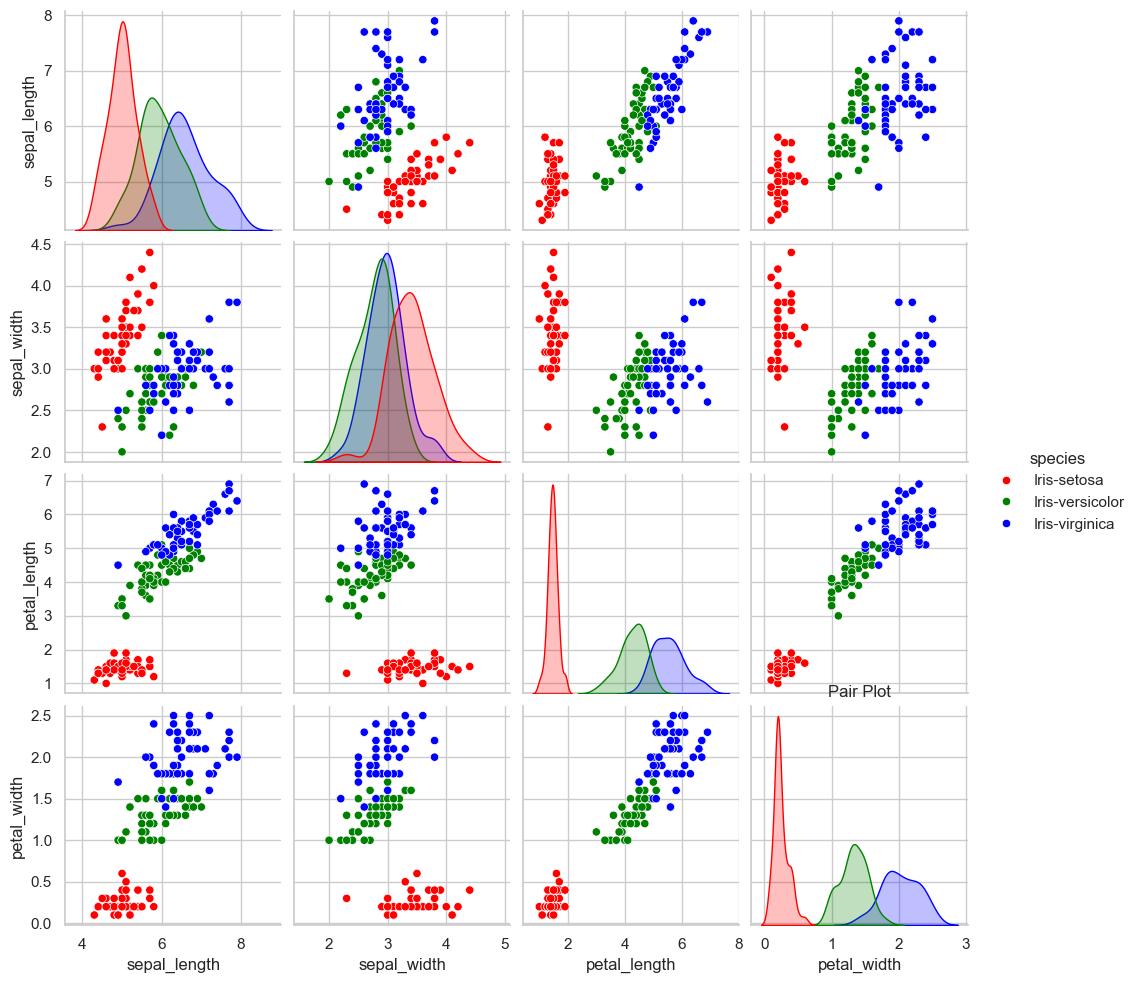

In [12]:
# Pairplot showing sepal and petal width and length for each species

# Define a colormap for species
color_map = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

# Map species names to colors
colors = df['species'].map(color_map)

# Combine the numeric columns and species into a single DataFrame
numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data = df[numeric_columns].copy()
data['species'] = df['species']

# Create the scatter plot matrix using Seaborn
plt.figure(figsize=(10, 6))
sns.pairplot(data, hue='species', palette=color_map)
plt.title('Pair Plot')
plt.show()

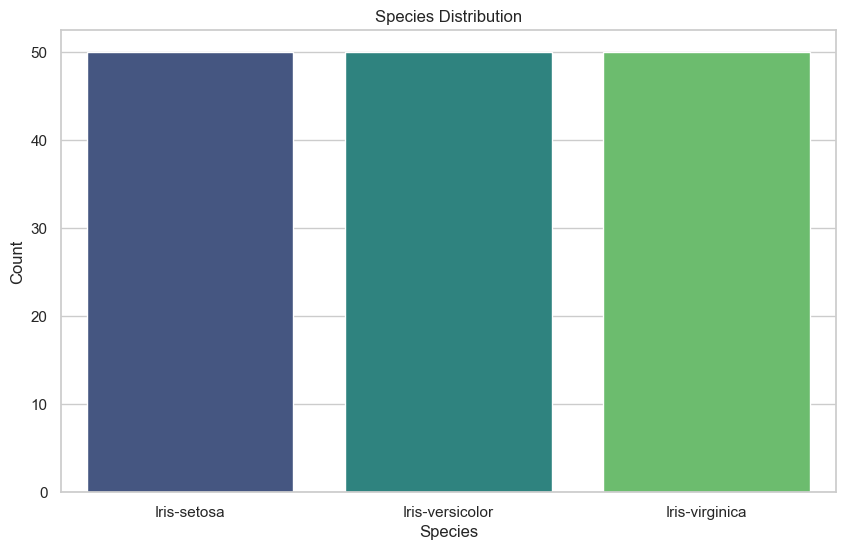

In [16]:
# Species distribution - Equal number of species distribution

species_counts = df['species'].value_counts()
# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=species_counts.index, y=species_counts.values, palette='viridis')
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

#### Feature Engineering - The process of selecting the best features for Machine Learning

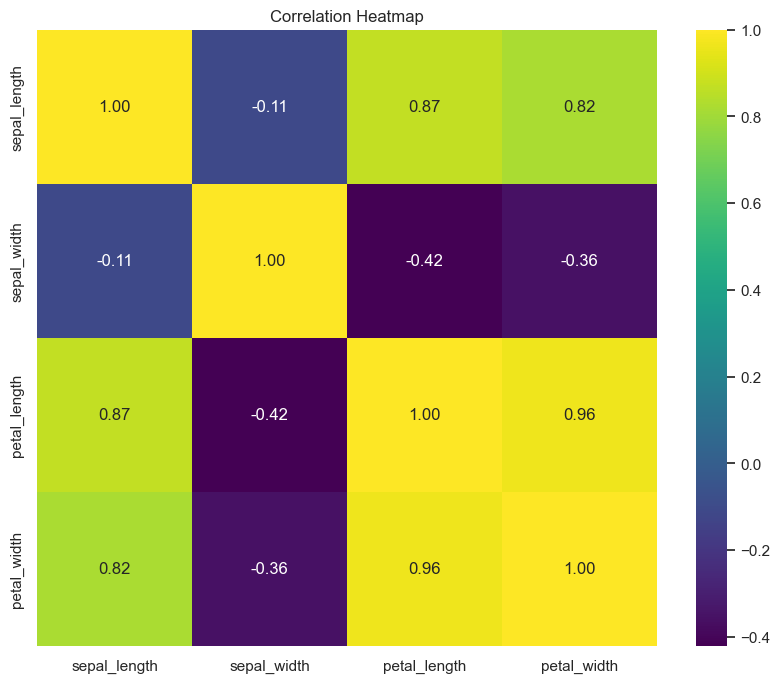

In [17]:
# Heatmp showing numeric columns correlations

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Set the style
sns.set(style="white")

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [66]:
# Converting the categorical values tgo numeric for machine learning

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "species" column in place
df['species'] = label_encoder.fit_transform(df['species'])

# Display the encoded values
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [67]:
# Define the features (X) and the target variable (y)
X = df.drop(columns=['species'])  # Features
y = df['species']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Models

In [78]:
# Train the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regression_model.predict(X_test)

# Define a threshold for classification
threshold = 0.5
y_pred_class = np.where(y_pred > threshold, 1, 0)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_class)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    precision = precision_score(y_test, y_pred_class, average='weighted')
    recall = recall_score(y_test, y_pred_class, average='weighted')
    f1 = f1_score(y_test, y_pred_class, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6333333333333333
Precision: 0.4683333333333334
Recall: 0.6333333333333333
F1 Score: 0.5195402298850574


In [79]:
# Train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Define a threshold for classification
threshold = 0.5
y_pred_class = np.where(y_pred > threshold, 1, 0)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_class)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    precision = precision_score(y_test, y_pred_class, average='weighted')
    recall = recall_score(y_test, y_pred_class, average='weighted')
    f1 = f1_score(y_test, y_pred_class, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.6333333333333333
Precision: 0.4683333333333334
Recall: 0.6333333333333333
F1 Score: 0.5195402298850574


In [81]:
# Train the decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [83]:
# Train the random forest model
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = forest_model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [85]:
# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Perform cross-validation
cv_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Compute the mean accuracy
mean_accuracy = np.mean(cv_scores)
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.95833333 1.         0.83333333 1.         0.91666667]
Mean Accuracy: 0.9416666666666668


In [87]:
# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Perform cross-validation
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Compute the mean accuracy
mean_accuracy = np.mean(cv_scores)
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.95833333 0.95833333 0.83333333 1.         0.95833333]
Mean Accuracy: 0.9416666666666667


#### The best models are Decision tree and Random Forest because they both gave 100% accuracies